In [7]:
import pandas as pd
df = pd.read_csv('heart_disease_uci 2.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
#step 2 Exploratory Data Analysis (EDA)

# Basic info
df.info()

# Summary statistics
df.describe(include='all')

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


 Drop High-Missing Columns

Columns like ca and thal have >50% missing. Drop them to simplify modeling.

In [13]:
df.drop(columns=['ca', 'thal'], inplace=True)

In [14]:
# Fill in Moderate Missing Values

for col in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-14-1060638797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [15]:
# Categorical Columns (fbs, restecg, slope, exang):

# Use mode (most common category):

for col in ['fbs', 'restecg', 'slope', 'exang']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [16]:
# Encode Categorical Variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [17]:
# Create Binary Target
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [18]:
from sklearn.preprocessing import StandardScaler

# Create the target column in df_encoded
df_encoded['target'] = df_encoded['num'].apply(lambda x: 1 if x > 0 else 0)

# Select features and target
X = df_encoded.drop(columns=['id', 'dataset', 'num', 'target'])  # Drop non-numeric or unnecessary
y = df_encoded['target']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

每张图说明：
	•	sex：男女比例
	•	cp：不同胸痛类型的分布
	•	fbs：空腹血糖大于120mg/dl的比例
	•	restecg：心电图结果的分布
	•	exang：是否运动诱发心绞痛的比例
	•	slope：ST段的坡度分布

/tmp/ipython-input-20-345501648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


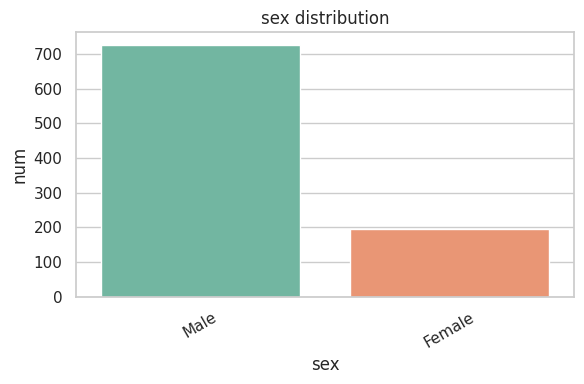

/tmp/ipython-input-20-345501648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


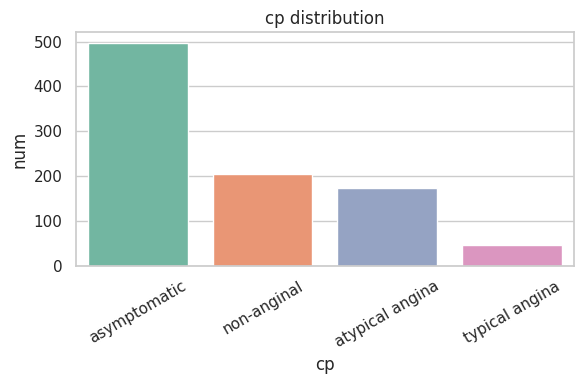

/tmp/ipython-input-20-345501648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


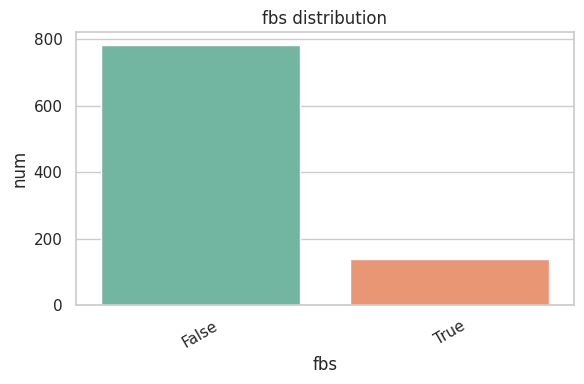

/tmp/ipython-input-20-345501648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


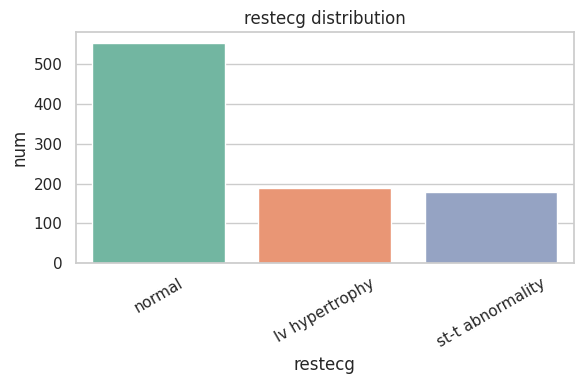

/tmp/ipython-input-20-345501648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


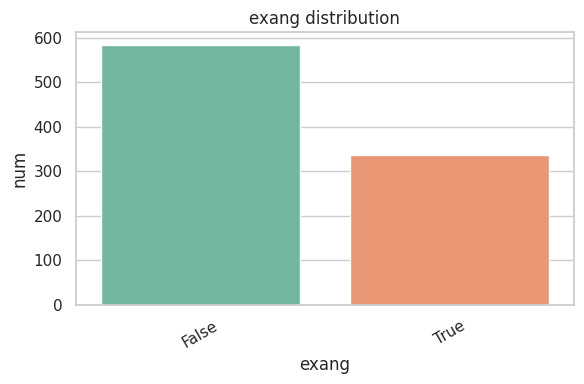

/tmp/ipython-input-20-345501648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")


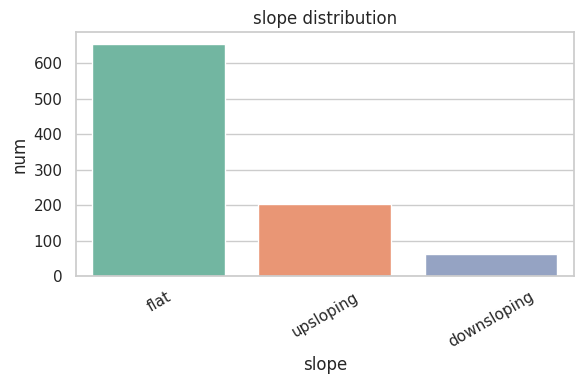

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# styling
sns.set(style="whitegrid")
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

# 画出每个分类变量的分布
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('num')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 使用之前预处理后的 DataFrame
df_encoded['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# deleting some columns
X = df_encoded.drop(columns=['id', 'dataset', 'num', 'target'])
y = df_encoded['target']

# train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardized scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# model prediction
y_pred = model.predict(X_test)

# metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.7989130434782609
Precision: 0.839622641509434
Recall: 0.8165137614678899
F1 score: 0.827906976744186


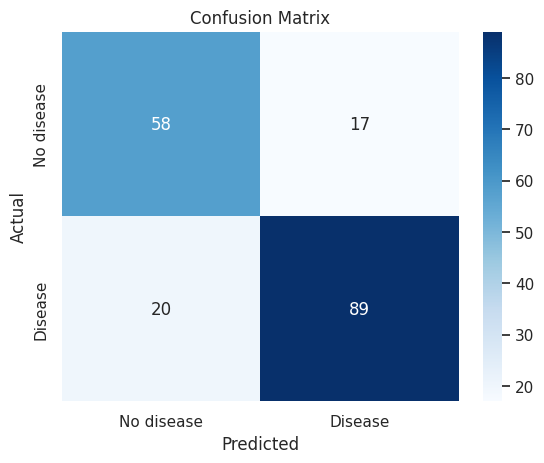

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No disease", "Disease"], yticklabels=["No disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

	•	True Negative (TN): correctly predicted no disease
	•	False Positive (FP): predicted disease, but actually no disease
	•	False Negative (FN): predicted no disease, but actually disease
	•	True Positive (TP): correctly predicted disease

From the results we can see:
  •	58 people were correctly predicted as not having heart disease.
	•	89 people were correctly predicted as having heart disease.
	•	17 people were wrongly predicted as having heart disease (but they actually didn’t).
	•	20 people were wrongly predicted as not having heart disease (but they actually did).


📊 Metric Interpretation
Accuracy(0.799 (≈ 80%)): Overall, the model correctly predicted ~80% of cases.

Precision(0.840): Among all patients predicted to have heart disease, ~84% actually had it.

Recall(0.817): Among all patients who actually had heart disease, ~81.7% were correctly identified.

F1 Score(0.828):A balance between precision and recall. Very solid.





Overall Evaluation:
	•	The model performs quite well, with balanced precision and recall — important in medical contexts.
	•	A recall of ~82% means most heart disease cases are being caught, which is crucial for diagnosis.
	•	The precision of ~84% means few false alarms, which is good for avoiding unnecessary anxiety or tests.
	•	Accuracy of 80% is strong given real-world healthcare data.